# Areal Project

<div>
<img src="logo.jpg", width=150, ALIGN="left", border=20>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
    <p>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, New challenges in remote sensing impose the necessity of designing
pixel classification methods that, once trained on a certain dataset, generalize to other areas of the earth.
In this challenge, we will thus design pixel classification methods on areas.  The goal is to find urban areas in the Areal dataset. Areal Dataset is a small data set created from the <a href="https://project.inria.fr/aerialimagelabeling/">Inria Aerial Image Labeling Dataset</a>. The data set contains covers a wide range of urban settlement appearances from 5 differents cities of different geographic locations. The data set is divided into 3 parts : training set, validation set and test set.

References and credits: 
Emmanuel Maggiori, Yuliya Tarabalka, Guillaume Charpiat, Pierre Alliez.
</div>

In [1]:
import numpy as np
import random
from sample_code_submission.model import AlexNetModel
import re

In [2]:
model_dir = "sample_code_submission"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [4]:
data_dir = 'sample_data'
data_name = 'Areal'

In [5]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 65
Number of features = 196608
        Class
0      forest
1       river
2    mountain
3      meadow
4     wetland
5   chaparral
6        lake
7    snowberg
8       beach
9         sea
10      cloud
11     island
12     desert
Number of classes = 13


In [6]:
print(data.head(1))

   pixel_1_1_R  pixel_1_1_G  pixel_1_1_B  pixel_1_2_R  pixel_1_2_G  \
0           63           72           51           85           94   

   pixel_1_2_B  pixel_1_3_R  pixel_1_3_G  pixel_1_3_B  pixel_1_4_R   ...    \
0           73           93          102           81           96   ...     

   pixel_256_254_R  pixel_256_254_G  pixel_256_254_B  pixel_256_255_R  \
0              121              106               85              128   

   pixel_256_255_G  pixel_256_255_B  pixel_256_256_R  pixel_256_256_G  \
0              111               91              125              108   

   pixel_256_256_B  target  
0               88    lake  

[1 rows x 196609 columns]


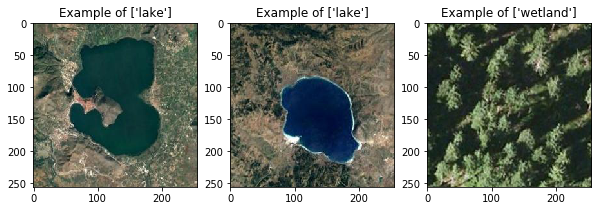

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 3
fig, _axs = plt.subplots(nrows=1, ncols=num_toshow, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.values[i][:-1].reshape(256,256,3)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [8]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

       target
0        lake
1        lake
2     wetland
3   chaparral
4      forest
5       beach
6   chaparral
7      desert
8      island
9         sea
10     forest
11    wetland
12     meadow
13   mountain
14   mountain
15     desert
16     desert
17      river
18      cloud
19     desert
20     island
21       lake
22      beach
23  chaparral
24     island
25      river
26        sea
27      cloud
28        sea
29    wetland
..        ...
35     forest
36     meadow
37     forest
38     forest
39      river
40      beach
41       lake
42      river
43       lake
44        sea
45   snowberg
46    wetland
47        sea
48   mountain
49      cloud
50  chaparral
51      beach
52     island
53      cloud
54   mountain
55     meadow
56     meadow
57  chaparral
58     island
59      beach
60   mountain
61     meadow
62   snowberg
63      river
64     desert

[65 rows x 1 columns]


In [9]:
m = AlexNetModel(verbose=True, use_cuda=True)

In [10]:
m.fit(X.values, y.values)

Epoch 0 : loss = 2.722212
Epoch 1 : loss = 2.542742
Epoch 2 : loss = 2.340432
Epoch 3 : loss = 2.071255
Epoch 4 : loss = 1.841053
Epoch 5 : loss = 1.587195
Epoch 6 : loss = 1.385920
Epoch 7 : loss = 1.140124
Epoch 8 : loss = 1.013213
Epoch 9 : loss = 0.757885


In [11]:
test = np.random.rand(10,3*256*256)
pred = m.predict(test)

In [12]:
print(pred)
print(pred.shape)
print(test.shape[0] * test.shape[-2] * test.shape[-1])

['lake' 'lake' 'lake' 'mountain' 'beach' 'lake' 'beach' 'lake' 'mountain'
 'lake']
(10,)
19660800
